## Mounting drive and initial imports

In [1]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Biogas RMS project/Datasets/Paper 13/paper13.csv')

X = df.drop(columns=['Cumulated biogas volume (L/(g VS))'])
y = df['Cumulated biogas volume (L/(g VS))']
# df.describe()
df.sample(5)

Mounted at /content/drive


,Biomass type,Reactor/feeding,VS (%),pH,OLR (g VS/l.d),HRT (d),T (°C),Reactor Volume (m³),Cumulated biogas volume (L/(g VS))
2,0,0,4.78,7.25,1.2400,15.0,37,0.0450,0.8227
0,0,0,10.00,7.62,0.6270,19.2,55,0.0500,0.0668
103,1,1,13.59,7.07,1.0000,30.0,35,0.0100,0.8543
51,1,-3,13.79,7.76,0.2000,50.0,37,0.0005,0.3894
37,0,-1,10.06,7.85,3.3553,30.0,37,0.0040,0.7600


## Installing and using pandas profiler

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 155 kB/s
     |████████████████████████████████| 102 kB 5.4 MB/s 
     |████████████████████████████████| 690 kB 33.4 MB/s 
     |████████████████████████████████| 4.7 MB 34.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 40.3 MB/s 
     |████████████████████████████████| 296 kB 51.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.1-py2.py3-none-any.whl size=310107 sha256=94ef3b9c8ab481d2a01e3a5c69058cfda626e36f3e0a04ad7ab51fe76899d8e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-udli9wyp/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=45ea8bd2634107d2ffa1f4cae0c290dd2dc487c9def2c68328ede578b09d2511
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Results from the report
### I. Correlation with Cumulative biogas production
There were 5 fields that were highly correlated with the cumulative biogas production:
1. Reactor/feeding
2. pH
3. Temperature
4. VS%
5. HRT

**Interesting observation:** `Biomass type` was not directly correlated to the output. But, it had a high correlation with reactor/feeding, pH, VS%, HRT, Reactor volume. 4 out of these 5 variables had direct correlation with the output variable.

### Spearman's rank correlation coefficient (ρ)
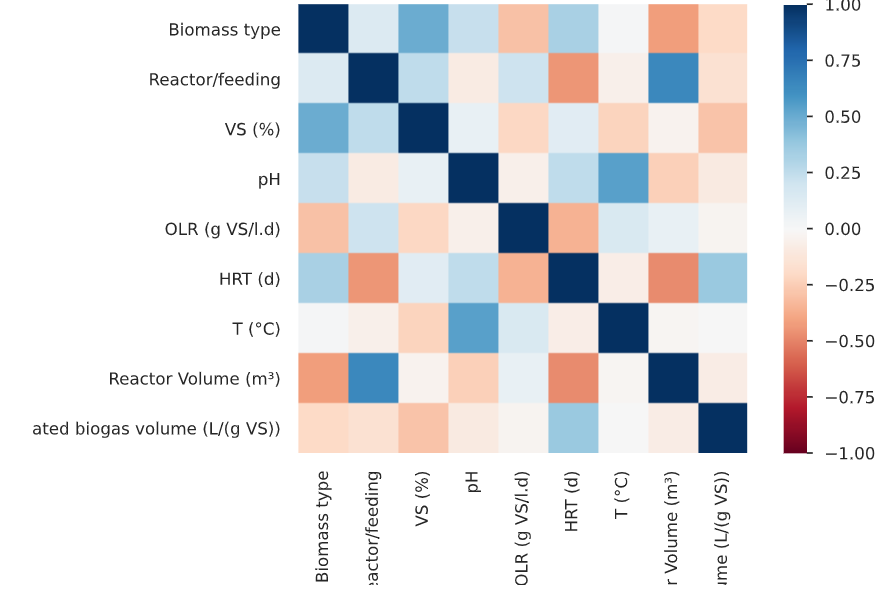

### Phik (φk)

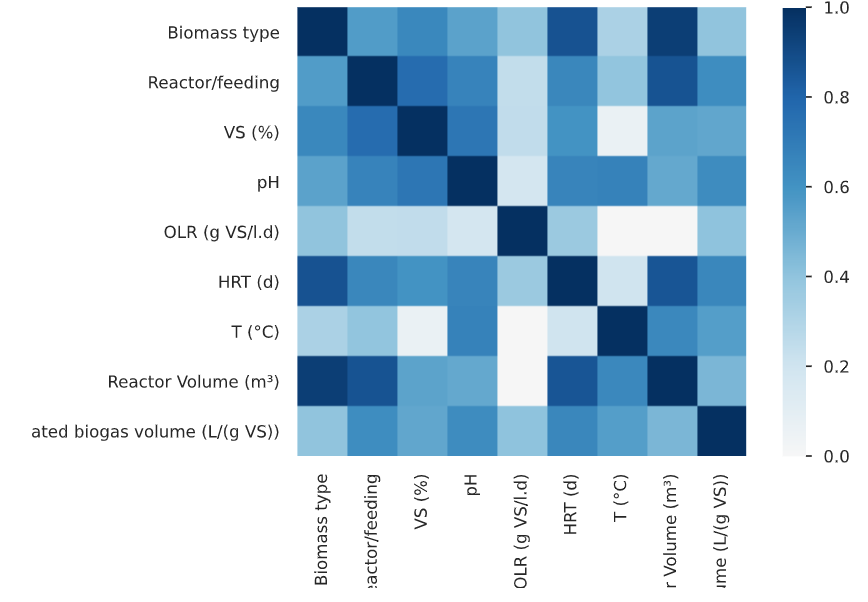

## Boxplots
These plots are only for the 4 numeric parameters that have high correlation with the output variable.

### 1. pH

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


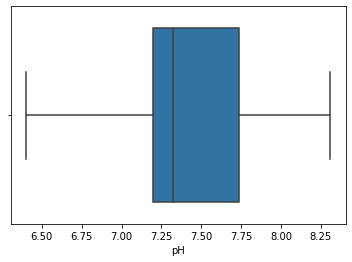

In [ ]:
sns.boxplot(df['pH'])

### 2. Temperature
There are 3 values that are in the thermophilic region (45 - 55 C) and 2 values below 30 degrees.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


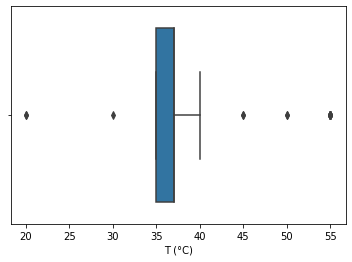

In [ ]:
sns.boxplot(df['T (°C)'])

### 3. VS% 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


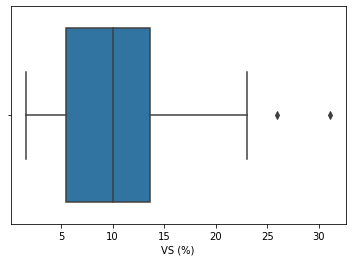

In [ ]:
sns.boxplot(df['VS (%)'])

### 4. HRT


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


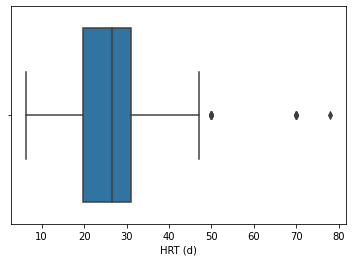

In [ ]:
sns.boxplot(df['HRT (d)'])

### 5. OLR

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


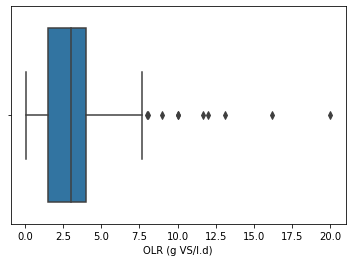

In [ ]:
sns.boxplot(df['OLR (g VS/l.d)'])

### 6. Biogas production

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


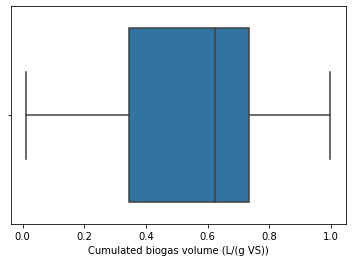

In [ ]:
sns.boxplot(df['Cumulated biogas volume (L/(g VS))'])

## Pairplots

1. Based on Reactor/feeding 

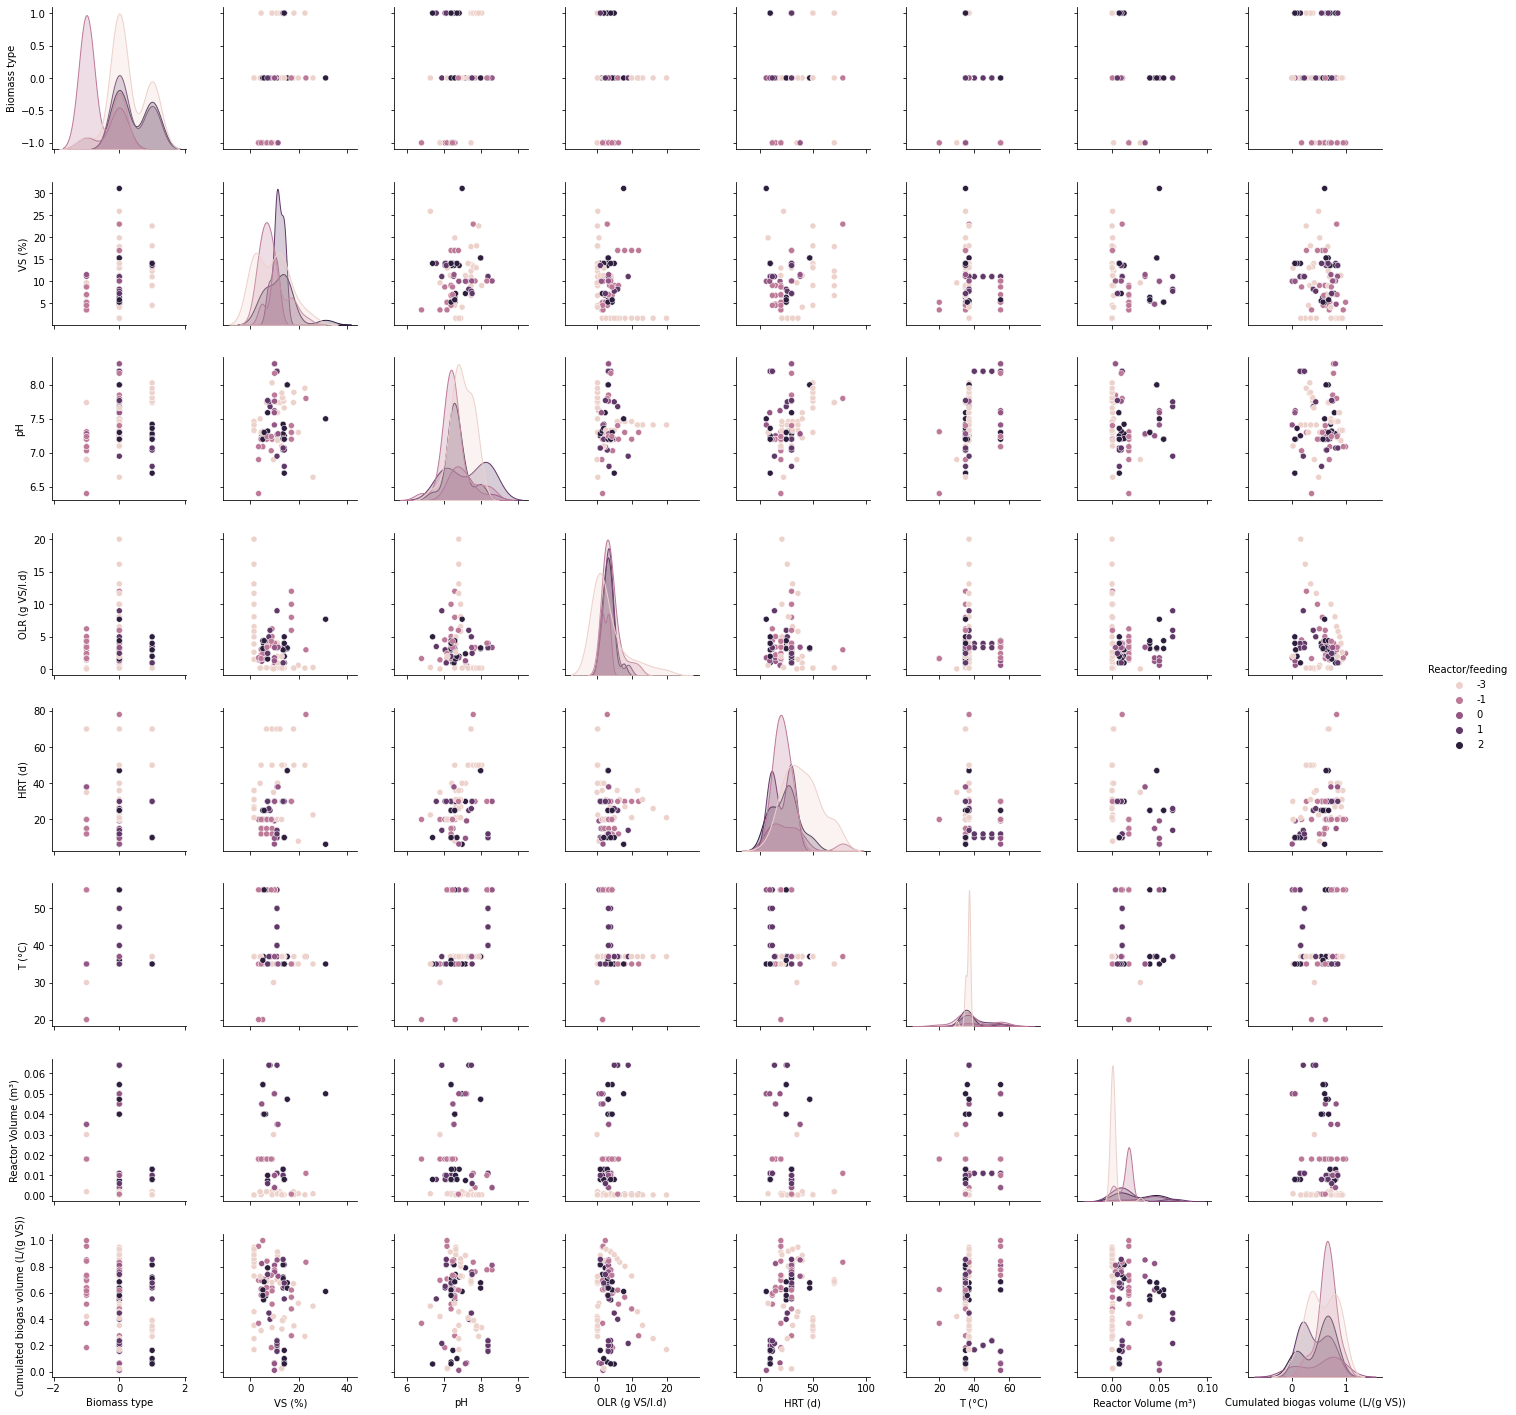

In [ ]:
sns.pairplot(df,hue='Reactor/feeding')

2. Based on biomass type

In [ ]:
sns.pairplot(df,hue='Biomass type')

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f584a0d2200> (for post_execute):


KeyboardInterrupt: ignored

3. Based on Biogas production

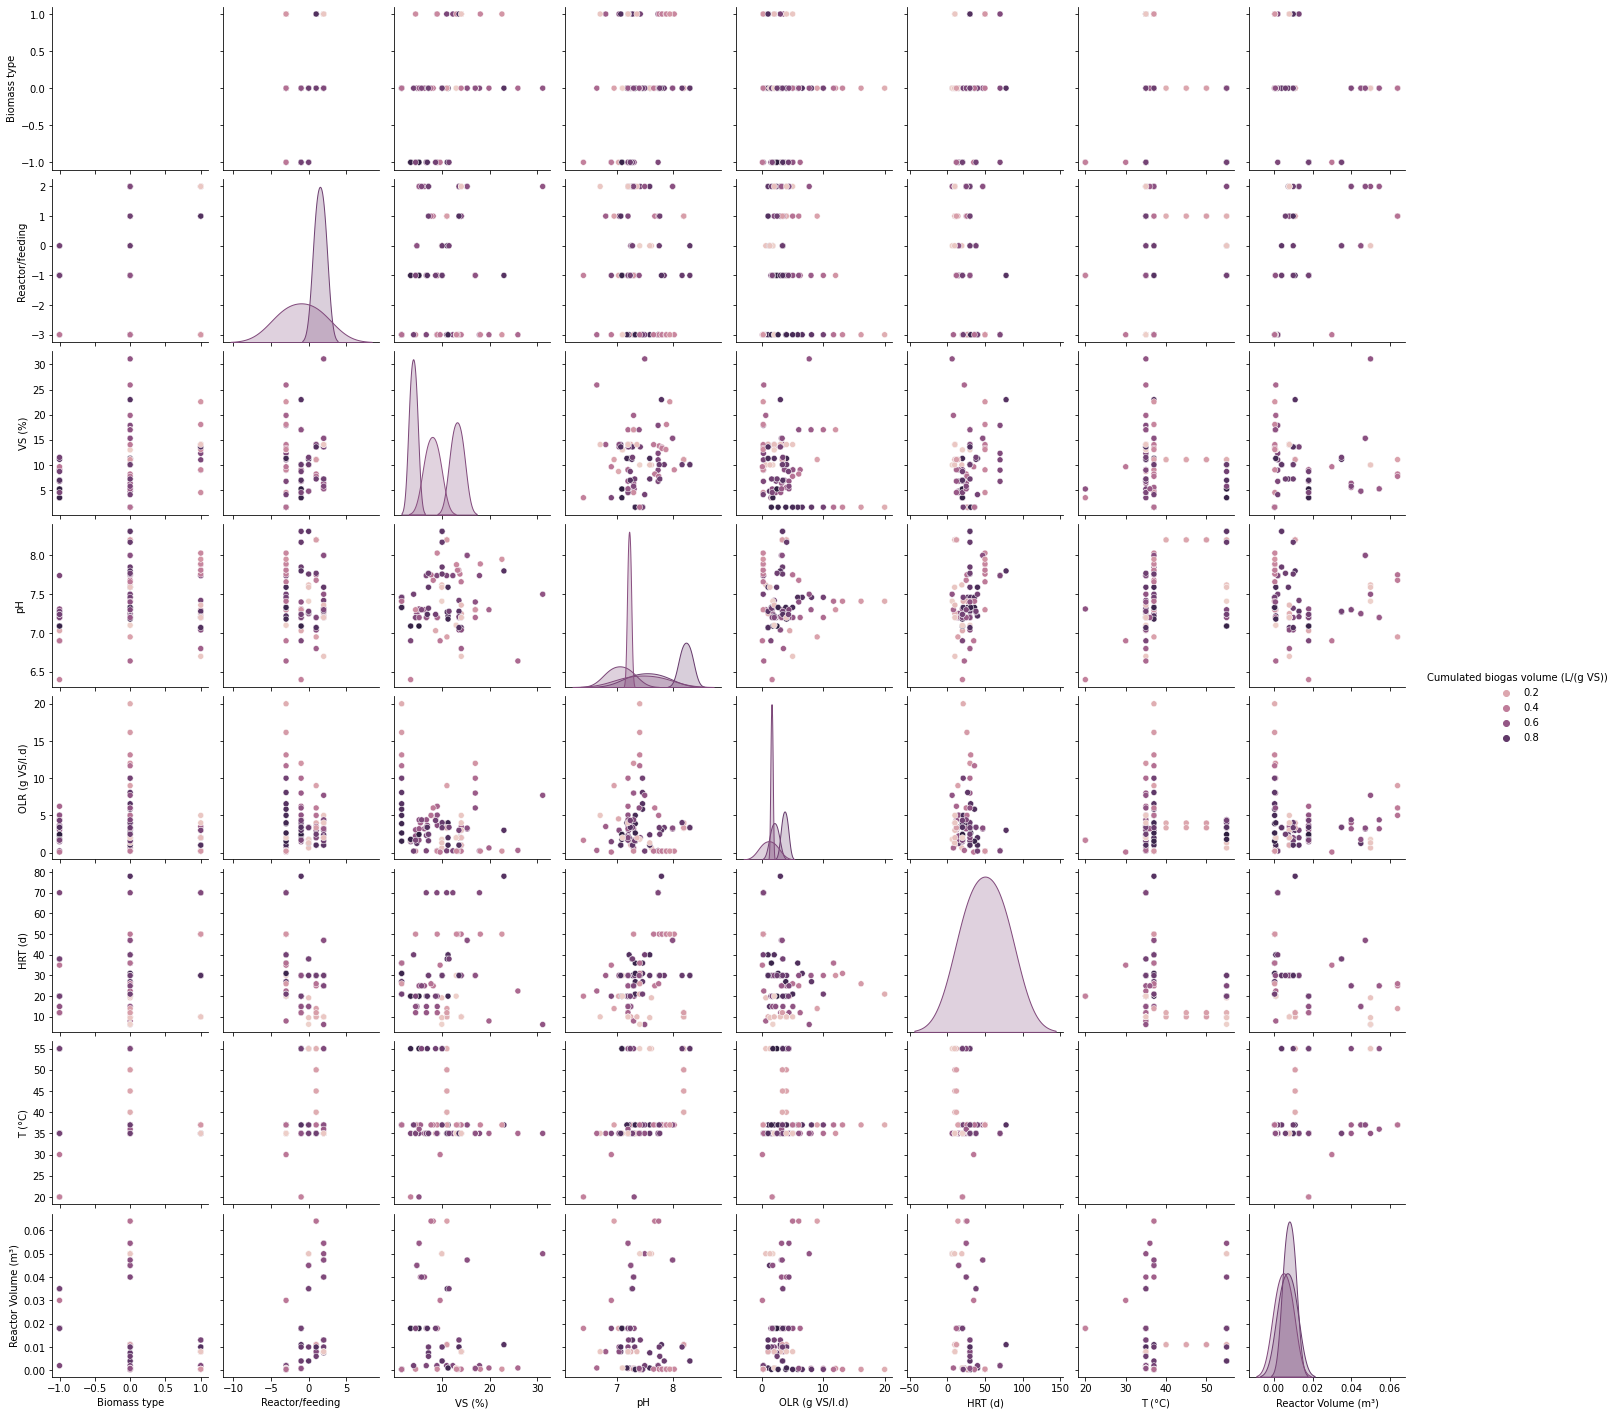

In [2]:
sns.pairplot(df,hue='Cumulated biogas volume (L/(g VS))')

## QQ Plots

Plots to check if the data is normally distributed.
Then, apply the Yeo-Johnson transformer to see if the distribution changes


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer

pt1 = PowerTransformer()
X_transformed = pt1.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

### 1. VS%

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


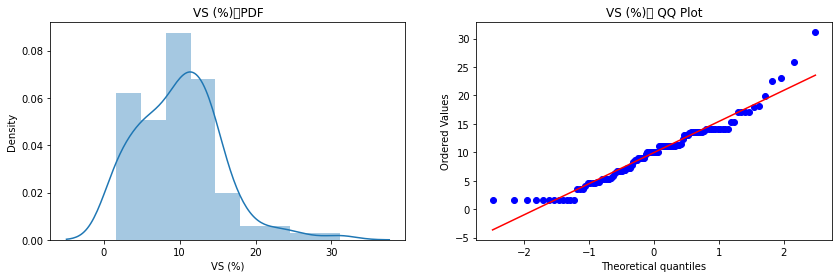

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


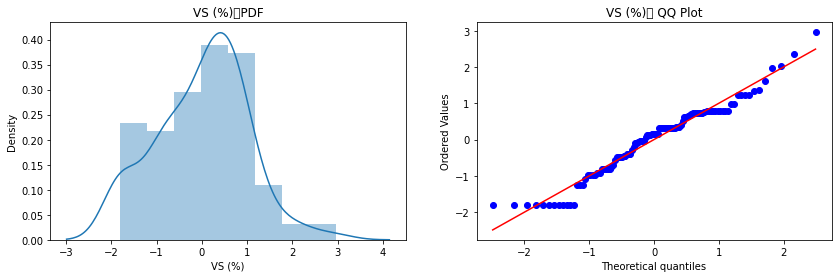

In [ ]:

# PLOT PDF AND QQ PLOT
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['VS (%)'])
plt.title('VS (%)	PDF')

plt.subplot(122)
stats.probplot(X['VS (%)'], dist="norm", plot=plt)
plt.title('VS (%)	 QQ Plot')

plt.show()

# Transformed
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_transformed['VS (%)'])
plt.title('VS (%)	PDF')

plt.subplot(122)
stats.probplot(X_transformed['VS (%)'], dist="norm", plot=plt)
plt.title('VS (%)	 QQ Plot')

plt.show()

### 2. pH

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


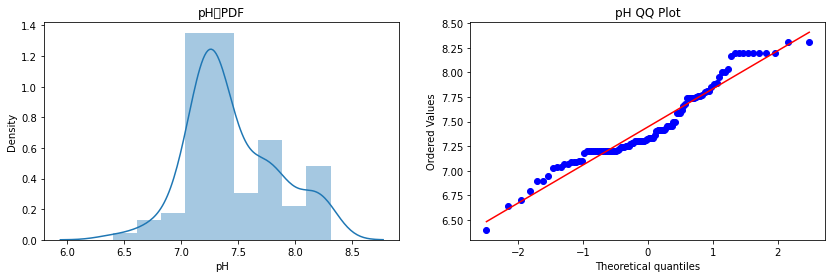

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


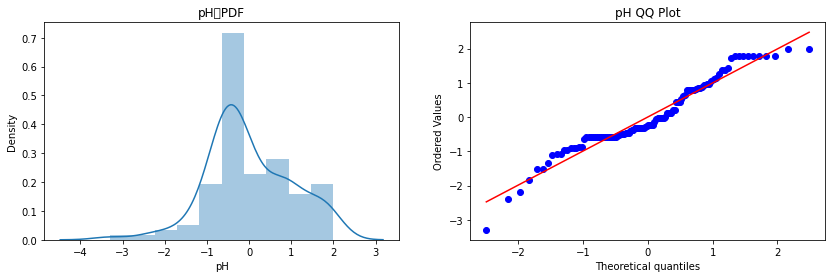

In [ ]:
# PLOT PDF AND QQ PLOT
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['pH'])
plt.title('pH	PDF')

plt.subplot(122)
stats.probplot(X['pH'], dist="norm", plot=plt)
plt.title('pH QQ Plot')

plt.show()

# Transformed
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_transformed['pH'])
plt.title('pH	PDF')

plt.subplot(122)
stats.probplot(X_transformed['pH'], dist="norm", plot=plt)
plt.title('pH QQ Plot')

plt.show()

### 3. OLR (g VS/l.d)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


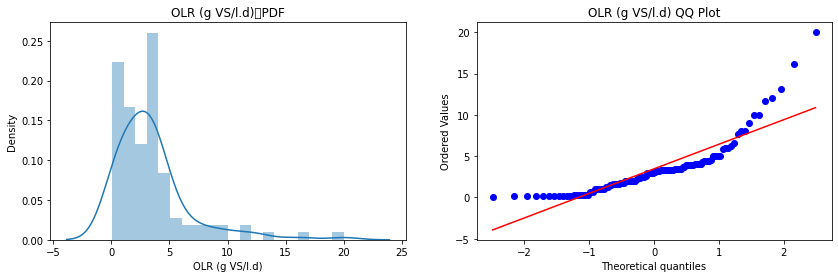

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


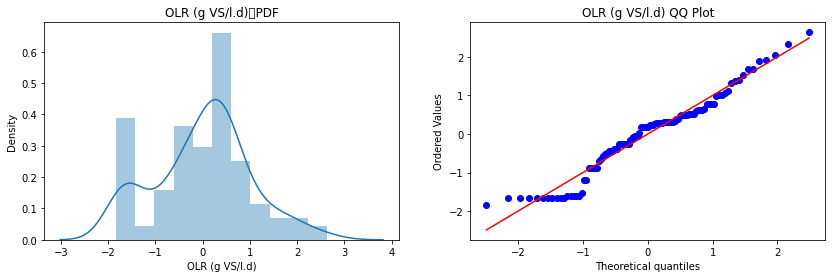

In [ ]:
# PLOT PDF AND QQ PLOT
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['OLR (g VS/l.d)'])
plt.title('OLR (g VS/l.d)	PDF')

plt.subplot(122)
stats.probplot(X['OLR (g VS/l.d)'], dist="norm", plot=plt)
plt.title('OLR (g VS/l.d) QQ Plot')

plt.show()

# transformed
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_transformed['OLR (g VS/l.d)'])
plt.title('OLR (g VS/l.d)	PDF')

plt.subplot(122)
stats.probplot(X_transformed['OLR (g VS/l.d)'], dist="norm", plot=plt)
plt.title('OLR (g VS/l.d) QQ Plot')

plt.show()

### 4. HRT (d)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


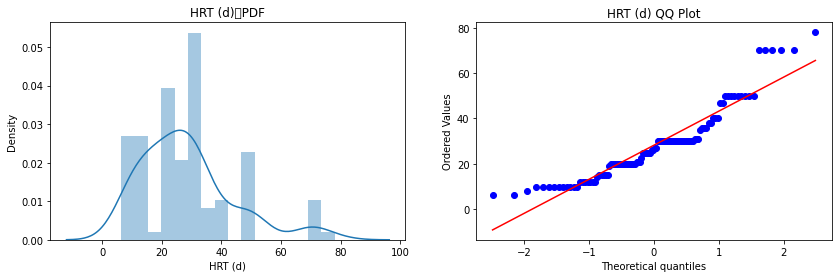

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


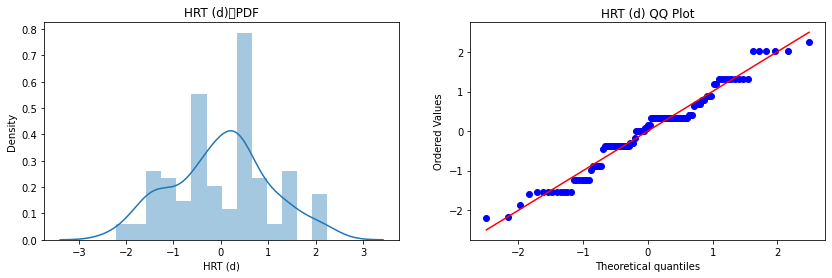

In [ ]:
# PLOT PDF AND QQ PLOT
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['HRT (d)'])
plt.title('HRT (d)	PDF')

plt.subplot(122)
stats.probplot(X['HRT (d)'], dist="norm", plot=plt)
plt.title('HRT (d) QQ Plot')

plt.show()

# transformed
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_transformed['HRT (d)'])
plt.title('HRT (d)	PDF')

plt.subplot(122)
stats.probplot(X_transformed['HRT (d)'], dist="norm", plot=plt)
plt.title('HRT (d) QQ Plot')

plt.show()

### 5. T (°C)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


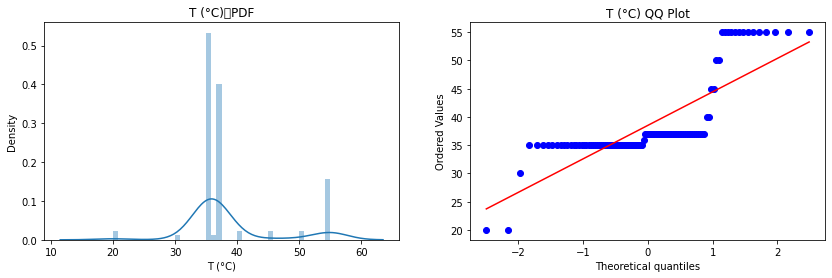

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


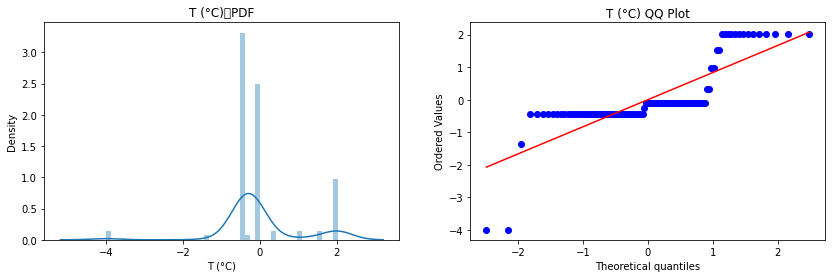

In [ ]:
# PLOT PDF AND QQ PLOT
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['T (°C)'])
plt.title('T (°C)	PDF')

plt.subplot(122)
stats.probplot(X['T (°C)'], dist="norm", plot=plt)
plt.title('T (°C) QQ Plot')

plt.show()

# transformed
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_transformed['T (°C)'])
plt.title('T (°C)	PDF')

plt.subplot(122)
stats.probplot(X_transformed['T (°C)'], dist="norm", plot=plt)
plt.title('T (°C) QQ Plot')

plt.show()

## 6. Reactor Volume

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


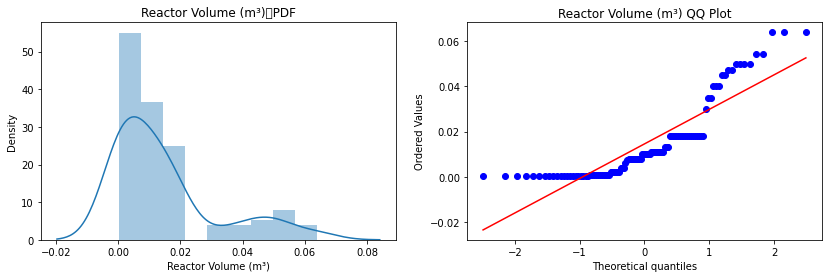

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


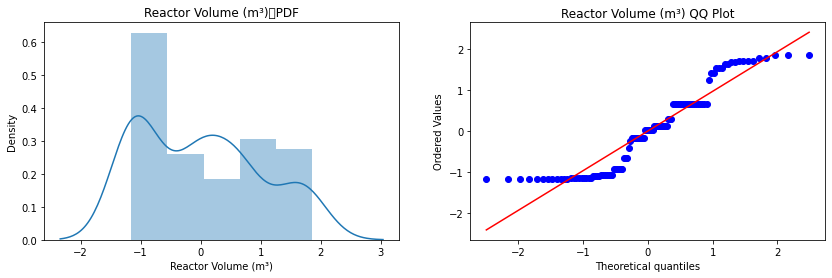

In [ ]:
# PLOT PDF AND QQ PLOT
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['Reactor Volume (m³)'])
plt.title('Reactor Volume (m³)	PDF')

plt.subplot(122)
stats.probplot(X['Reactor Volume (m³)'], dist="norm", plot=plt)
plt.title('Reactor Volume (m³) QQ Plot')

plt.show()

# transformed
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_transformed['Reactor Volume (m³)'])
plt.title('Reactor Volume (m³)	PDF')

plt.subplot(122)
stats.probplot(X_transformed['Reactor Volume (m³)'], dist="norm", plot=plt)
plt.title('Reactor Volume (m³) QQ Plot')

plt.show()